In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [13]:
df = pd.read_csv('spotify-songs-preprocessed.csv')
spotify.columns

Index(['track_name', 'album', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'album_songs', 'popular',
       'genre_pop', 'genre_rap', 'genre_dance pop', 'genre_hip hop',
       'genre_pop rap', 'genre_rock', 'genre_r&b', 'genre_trap',
       'genre_urban contemporary', 'genre_southern hip hop',
       'genre_modern rock', 'genre_electro', 'genre_edm', 'genre_canadian pop',
       'genre_house', 'text_col'],
      dtype='object')

In [14]:
df['text_col'] = df['track_name'] + df['album'] + df['artist_name'] + df['artist_genres']
df['text_col']

0       It Wasn't MeHot ShotShaggy['pop rap'; 'reggae ...
1       SurvivorSurvivorDestiny's Child['dance pop'; '...
2       StanThe Marshall Mathers LPEminem['detroit hip...
3       Can't Get You out of My HeadFeverKylie Minogue...
4       Lady Marmalade - Single EditLady MarmaladeChri...
                              ...                        
2194    Die HardMr, Morale & The Big SteppersKendrick ...
2195                     Big Energy777Latto['trap queen']
2196                 DojaDojaCentral Cee['melodic drill']
2197    pushin P (feat, Young Thug)DS4EVERGunna['atl h...
2198    Thousand MilesThousand MilesThe Kid LAROI['aus...
Name: text_col, Length: 2199, dtype: object

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

tokenizer = RegexpTokenizer(r'\w+')


df['tokens'] = df.apply(lambda x: tokenizer.tokenize(x['text_col']), axis = 1)
df

[nltk_data] Downloading package punkt to /Users/apibala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apibala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,track_name,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,...,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house,text_col,tokens
0,It Wasn't Me,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,...,0,0,0,0,0,0,0,0,It Wasn't MeHot ShotShaggy['pop rap'; 'reggae ...,"[It, Wasn, t, MeHot, ShotShaggy, pop, rap, reg..."
1,Survivor,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,...,0,1,0,0,0,0,0,0,SurvivorSurvivorDestiny's Child['dance pop'; '...,"[SurvivorSurvivorDestiny, s, Child, dance, pop..."
2,Stan,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,...,0,0,0,0,0,0,0,0,StanThe Marshall Mathers LPEminem['detroit hip...,"[StanThe, Marshall, Mathers, LPEminem, detroit..."
3,Can't Get You out of My Head,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,...,0,0,0,0,0,0,0,0,Can't Get You out of My HeadFeverKylie Minogue...,"[Can, t, Get, You, out, of, My, HeadFeverKylie..."
4,Lady Marmalade - Single Edit,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,...,0,0,0,0,0,0,0,0,Lady Marmalade - Single EditLady MarmaladeChri...,"[Lady, Marmalade, Single, EditLady, MarmaladeC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Die Hard,"Mr, Morale & The Big Steppers",Kendrick Lamar,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...,86,0.775,0.736,1.0,90.0,0.0,...,0,0,0,0,0,0,0,0,"Die HardMr, Morale & The Big SteppersKendrick ...","[Die, HardMr, Morale, The, Big, SteppersKendri..."
2195,Big Energy,777,Latto,['trap queen'],85,0.937,0.793,11.0,64.0,0.0,...,1,0,0,0,0,0,0,0,Big Energy777Latto['trap queen'],"[Big, Energy777Latto, trap, queen]"
2196,Doja,Doja,Central Cee,['melodic drill'],82,0.911,0.573,6.0,87.0,1.0,...,0,0,0,0,0,0,0,0,DojaDojaCentral Cee['melodic drill'],"[DojaDojaCentral, Cee, melodic, drill]"
2197,"pushin P (feat, Young Thug)",DS4EVER,Gunna,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],84,0.773,0.422,1.0,66.0,0.0,...,1,0,0,0,0,0,0,0,"pushin P (feat, Young Thug)DS4EVERGunna['atl h...","[pushin, P, feat, Young, Thug, DS4EVERGunna, a..."


In [17]:
from nltk.corpus import stopwords
nltkstop=stopwords.words('english')
print(len(nltkstop), "stop words provided by nltk: ")
print(nltkstop)

198 stop words provided by nltk: 
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', '

In [18]:
df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in nltkstop])
df

,track_name,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,...,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house,text_col,tokens
0,It Wasn't Me,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,...,0,0,0,0,0,0,0,0,It Wasn't MeHot ShotShaggy['pop rap'; 'reggae ...,"[It, Wasn, MeHot, ShotShaggy, pop, rap, reggae..."
1,Survivor,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,...,0,1,0,0,0,0,0,0,SurvivorSurvivorDestiny's Child['dance pop'; '...,"[SurvivorSurvivorDestiny, Child, dance, pop, g..."
2,Stan,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,...,0,0,0,0,0,0,0,0,StanThe Marshall Mathers LPEminem['detroit hip...,"[StanThe, Marshall, Mathers, LPEminem, detroit..."
3,Can't Get You out of My Head,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,...,0,0,0,0,0,0,0,0,Can't Get You out of My HeadFeverKylie Minogue...,"[Can, Get, You, My, HeadFeverKylie, Minogue, a..."
4,Lady Marmalade - Single Edit,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,...,0,0,0,0,0,0,0,0,Lady Marmalade - Single EditLady MarmaladeChri...,"[Lady, Marmalade, Single, EditLady, MarmaladeC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Die Hard,"Mr, Morale & The Big Steppers",Kendrick Lamar,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...,86,0.775,0.736,1.0,90.0,0.0,...,0,0,0,0,0,0,0,0,"Die HardMr, Morale & The Big SteppersKendrick ...","[Die, HardMr, Morale, The, Big, SteppersKendri..."
2195,Big Energy,777,Latto,['trap queen'],85,0.937,0.793,11.0,64.0,0.0,...,1,0,0,0,0,0,0,0,Big Energy777Latto['trap queen'],"[Big, Energy777Latto, trap, queen]"
2196,Doja,Doja,Central Cee,['melodic drill'],82,0.911,0.573,6.0,87.0,1.0,...,0,0,0,0,0,0,0,0,DojaDojaCentral Cee['melodic drill'],"[DojaDojaCentral, Cee, melodic, drill]"
2197,"pushin P (feat, Young Thug)",DS4EVER,Gunna,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],84,0.773,0.422,1.0,66.0,0.0,...,1,0,0,0,0,0,0,0,"pushin P (feat, Young Thug)DS4EVERGunna['atl h...","[pushin, P, feat, Young, Thug, DS4EVERGunna, a..."


In [19]:
import spacy as spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_spacy(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]
    
df['tokens'] = df['tokens'].apply(lemmatize_spacy)
df
df.to_excel("data_lemmatization.xlsx")

In [20]:
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
df


,track_name,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,...,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house,text_col,tokens
0,It Wasn't Me,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,...,0,0,0,0,0,0,0,0,It Wasn't MeHot ShotShaggy['pop rap'; 'reggae ...,it Wasn MeHot ShotShaggy pop rap reggae fusion
1,Survivor,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,...,0,1,0,0,0,0,0,0,SurvivorSurvivorDestiny's Child['dance pop'; '...,survivorsurvivordestiny child dance pop girl g...
2,Stan,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,...,0,0,0,0,0,0,0,0,StanThe Marshall Mathers LPEminem['detroit hip...,StanThe Marshall Mathers LPEminem detroit hip ...
3,Can't Get You out of My Head,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,...,0,0,0,0,0,0,0,0,Can't Get You out of My HeadFeverKylie Minogue...,can get you my HeadFeverKylie Minogue australi...
4,Lady Marmalade - Single Edit,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,...,0,0,0,0,0,0,0,0,Lady Marmalade - Single EditLady MarmaladeChri...,Lady Marmalade Single EditLady MarmaladeChrist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Die Hard,"Mr, Morale & The Big Steppers",Kendrick Lamar,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...,86,0.775,0.736,1.0,90.0,0.0,...,0,0,0,0,0,0,0,0,"Die HardMr, Morale & The Big SteppersKendrick ...",die HardMr Morale the Big SteppersKendrick Lam...
2195,Big Energy,777,Latto,['trap queen'],85,0.937,0.793,11.0,64.0,0.0,...,1,0,0,0,0,0,0,0,Big Energy777Latto['trap queen'],big Energy777Latto trap queen
2196,Doja,Doja,Central Cee,['melodic drill'],82,0.911,0.573,6.0,87.0,1.0,...,0,0,0,0,0,0,0,0,DojaDojaCentral Cee['melodic drill'],dojadojacentral Cee melodic drill
2197,"pushin P (feat, Young Thug)",DS4EVER,Gunna,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],84,0.773,0.422,1.0,66.0,0.0,...,1,0,0,0,0,0,0,0,"pushin P (feat, Young Thug)DS4EVERGunna['atl h...",pushin p feat Young Thug DS4EVERGunna atl hip ...


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(
    df['tokens'], 
    df['popular'], 
    test_size= 0.2
    )

In [22]:
print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  1759
Testing data set size:  440


In [23]:
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

In [24]:
x_test_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3565 stored elements and shape (440, 4605)>

In [25]:
from sklearn.naive_bayes import MultinomialNB 

naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [26]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

In [27]:
print("## Train Accuracy")
print(print_scores(f"{train_scores:.2%}"))
print("\n## Test Accuracy")
print(print_scores(f"{test_scores:.2%}"))

## Train Accuracy
Balanced Accuracy: 83.88%

## Test Accuracy
Balanced Accuracy: 60.08%


Confusion Matrix


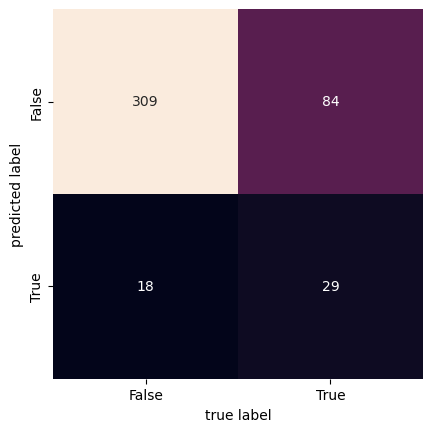

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix")
mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
words = np.array(vectorizer.get_feature_names_out())
coefs = naive_bayes_fit.feature_log_prob_[0]

top = np.argsort(coefs)[-20:]
print(words[top])

['be' 'post' 'edition' 'neo' 'you' 'canadian' 'deluxe' 'southern' 'house'
 'urban' 'trap' 'contemporary' 'the' 'feat' 'rock' 'dance' 'hop' 'hip'
 'rap' 'pop']


The BoW model archieved a very high performance in differentiating between Bill Gates and Elon Musk tweets.The confusion matric shows also a strong seperation between both authors. 

## TD IDF Approach

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.95, min_df=10)
X_train_tfidf = tfidf_vectorizer.fit_transform(df['tokens'])

print(type(X_train_tfidf)) # sparse matrix
print(X_train_tfidf.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(2199, 513)


In [33]:
y_train = df["popular"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train_tfidf,y_train,test_size=0.20,random_state=0)

print("Training data set size: ", X_train.shape)
print("Testing data set size: ", X_test.shape)

Training data set size:  (1759, 513)
Testing data set size:  (440, 513)


In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(X_train, y_train_enc)

y_proba_train = naive_bayes.predict_proba(X_train)[:, 1]
y_proba_test = naive_bayes.predict_proba(X_test)[:, 1]  

cutoff = 0.5

train_predict = (y_proba_train >= cutoff).astype(int)
test_predict = (y_proba_test >= cutoff).astype(int)

def get_scores(y_real, predict):
  return balanced_accuracy_score(y_real, predict)

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train_enc, train_predict)
test_scores = get_scores(y_test_enc, test_predict)

print("## Train Accuracy")
print(print_scores(f"{train_scores:.2%}"))
print("\n## Test Accuracy")
print(print_scores(f"{test_scores:.2%}"))

## Train Accuracy
Balanced Accuracy: 61.80%

## Test Accuracy
Balanced Accuracy: 57.46%


Confusion Matrix


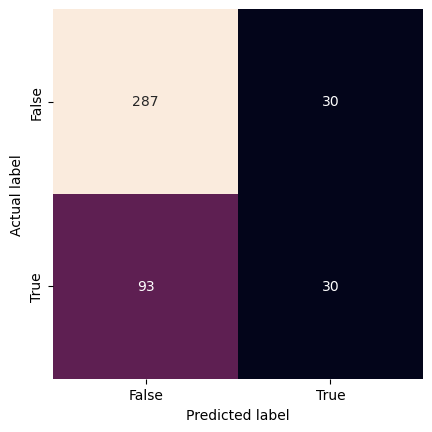

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix")
mat = confusion_matrix(y_test_enc, test_predict)

labels = le.classes_ 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [36]:
words = np.array(tfidf_vectorizer.get_feature_names_out())
coefs = naive_bayes_fit.feature_log_prob_[0]

top = np.argsort(coefs)[-20:]
print(words[top])

['edition' 'be' 'trap' 'you' 'deluxe' 'urban contemporary' 'urban'
 'pop rap' 'contemporary' 'the' 'feat' 'rock' 'dance pop' 'pop pop'
 'hip hop' 'hop' 'dance' 'hip' 'rap' 'pop']


The TF-IDF model archieved also a very high performance in differentiating between both authors. The BoW model performed slightly better, but this is probably due to downweighting frequent terms and instead focusing on more informative terms. Key words like learn and live got in the top words for this model.